# BONOS SOBERANOS

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
excel = 'C:/Users/Bloomberg/Desktop/Gabriel/soberanos.xlsx'

df = pd.read_excel(excel, engine = 'openpyxl') 

df = df.dropna(0, how='all')
df = df.dropna(1, how='all')

In [3]:
bonos_ar = df.loc[df['ley'] == "AR"]
dm_ar = round(bonos_ar['dm'],2)
ytm_ar = round(bonos_ar['ytm'],2)

bonos_ny = df.loc[df['ley'] == "NY"]
dm_ny = round(bonos_ny['dm'],2)
ytm_ny = round(bonos_ny['ytm'],2)

bonos_eu = df.loc[df['ley'] == "NY - EU"]
dm_eu = round(bonos_eu['dm'],2)
ytm_eu = round(bonos_eu['ytm'],2)

In [4]:
#Curva Interpolada Ley Argentina

poly_degree = 2
curve_ar = np.polyfit(dm_ar, ytm_ar, poly_degree)

start_ar = 5
stop_ar = 9
num_points= 10000
arbitrary_times_ar = np.linspace(start_ar, stop_ar, num_points)

poly_ar = np.polyval(curve_ar, arbitrary_times_ar)

#Curva Interpolada Ley Argentina

curve_ny = np.polyfit(dm_ny, ytm_ny, poly_degree)

start_ny = 5
stop_ny = 8.5
num_points_ny = 10000
arbitrary_times_ny= np.linspace(start_ny, stop_ny, num_points_ny)

poly_ny = np.polyval(curve_ny, arbitrary_times_ny)

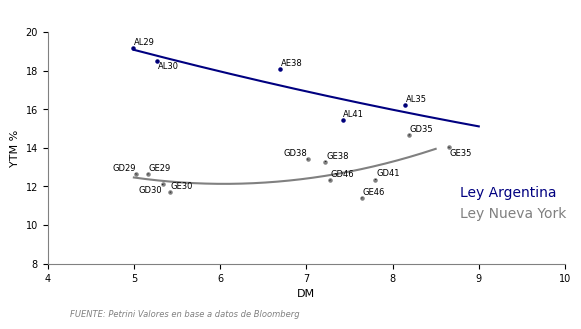

In [10]:
main_font = "Open Sans"
plot_color = "grey"

plot_color_ar = "navy"
plot_color_ny = "grey"
plot_color_eu = "mediumseagreen"

font_dict1 = {'fontfamily':'Open Sans','color':'black','size':6}
font_dict2 = {'fontfamily':'Open Sans','color':'grey','size':6}
    
fuente = "FUENTE: Petrini Valores en base a datos de Bloomberg"    

from datetime import date
today = date.today()
t1 = today.strftime("%d/%m/%Y")

def plot_mtcars(adjust=True, *args, **kwargs):
    fig, ax = plt.subplots(figsize=(6, 3))
    fig.set_facecolor("white")
    plt.rcParams["figure.figsize"] = (10,7)    
    ax.plot(arbitrary_times_ar, poly_ar,c = plot_color_ar, zorder = 1)
    ax.scatter(dm_ar, ytm_ar, s = 5, c = plot_color_ar, zorder = 0) 
    ax.plot(arbitrary_times_ny, poly_ny, c = plot_color_ny, zorder = 2)
    ax.scatter(dm_ny, ytm_ny, s = 5, c = plot_color_ny, zorder = 3)  
    ax.scatter(dm_eu, ytm_eu, s = 5, c = plot_color_eu, zorder = 3)  
    texts = []
    for x, y, s in zip(df['dm'], df['ytm'], df['cod_loc']):
        texts.append(plt.text(x, y, s, size=6))
    plt.xlabel('DM', fontsize=8)
    plt.ylabel('YTM %', fontsize=8)
    
    #fig.text(0.15,1,"BONOS SOBERANOS EN USD", fontsize=9, fontweight="bold", font = main_font)        
    #fig.text(0.15,0.95, t1 ,fontweight="regular", fontsize=6)
    fig.text(0.8,0.4,"Ley Argentina", fontsize= 1, font = main_font, color = plot_color_ar)        
    fig.text(0.8,0.33,"Ley Nueva York", fontsize= 1, font = main_font, color = plot_color_ny)
    fig.text(0.15,0,fuente, fontdict = font_dict2, fontstyle = "italic")  

    ax.grid(False)

    ax.set_xlim(4,10)
    ax.set_ylim(8,20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(plot_color)
    ax.spines['left'].set_color(plot_color)

    ax.tick_params(axis="x",color = "black", labelcolor = "black" ,labelsize = 7)
    ax.tick_params(axis="y",color = "black", labelcolor = "black" ,labelsize = 7)

    ax.set_position([0.1,0.1,0.5,0.5])

    plt.style.use('default')
    plt.rcParams['font.family'] = main_font
    if adjust:
        plt.title('%s iterations' % adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs), c = "white")
    else:
        plt.title('Original')

plot_mtcars()   

path_png = r'C:/Users/Bloomberg/Desktop/Gabriel/Soberanos_USD.png'
    
plt.tight_layout()
plt.savefig(path_png, dpi = 300)

# BONOS PROVINCIALES 

In [11]:
excel_pr = 'C:/Users/Bloomberg/Desktop/Gabriel/provinciales.xlsx'

df_pr = pd.read_excel(excel_pr, engine = 'openpyxl') 

df_pr = df_pr.dropna(0, how='all')
df_pr = df_pr.dropna(1, how='all')

In [12]:
dm_pr = round(df_pr['dm'],2)
ytm_pr = round(df_pr['ytm'],2)

In [13]:
poly_degree_pr= 2
curve_pr = np.polyfit(dm_pr, ytm_pr, poly_degree_pr)

start_pr = 1
stop_pr = 9
num_points_pr = 10000
arbitrary_times_pr = np.linspace(start_pr, stop_pr, num_points_pr)

poly_pr = np.polyval(curve_pr, arbitrary_times_pr)

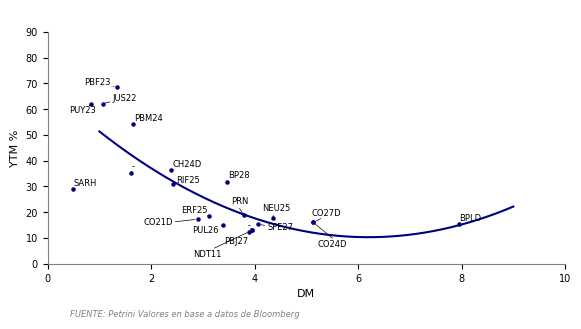

In [14]:
main_font = "Open Sans"
plot_color = "grey"

plot_color_pr = "navy"
#plot_color_ny = "grey"

font_dict1 = {'fontfamily':'Open Sans','color':'black','size':6}
font_dict2 = {'fontfamily':'Open Sans','color':'grey','size':6}
    

fuente = "FUENTE: Petrini Valores en base a datos de Bloomberg"    


from datetime import date
today = date.today()
t1 = today.strftime("%d/%m/%Y")

def plot_mtcars(adjust=True, *args, **kwargs):
    fig, ax = plt.subplots(figsize=(6, 3))
    fig.set_facecolor("white")
    plt.rcParams["figure.figsize"] = (10,7)
    ax.plot(arbitrary_times_pr, poly_pr,c = plot_color_pr, zorder = 1)
    ax.scatter(df_pr['dm'], df_pr['ytm'], s = 5, c = plot_color_pr, zorder = 0) 
    texts = []
    for x, y, s in zip(df_pr['dm'], df_pr['ytm'], df_pr['cod_loc']):
        texts.append(plt.text(x, y, s, size=6))
    plt.xlabel('DM', fontsize=8)
    plt.ylabel('YTM %', fontsize=8)
    #fig.text(0.15,1,"BONOS PROVINCIALES EN USD", fontsize=9, fontweight="bold", font = main_font)        
    #fig.text(0.15,0.95, t1 ,fontweight="regular", fontsize=6)
    fig.text(0.15,0,fuente, fontdict = font_dict2, fontstyle = "italic")

    ax.grid(False)

    ax.set_xlim(0,10)
    ax.set_ylim(0,90)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(plot_color)
    ax.spines['left'].set_color(plot_color)

    ax.tick_params(axis="x",color = "black", labelcolor = "black" ,labelsize = 7)
    ax.tick_params(axis="y",color = "black", labelcolor = "black" ,labelsize = 7)

    ax.set_position([0.1,0.1,0.5,0.5])

    plt.style.use('default')
    plt.rcParams['font.family'] = main_font
    if adjust:
        plt.title('%s iterations' % adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs), c = "white")
    else:
        plt.title('Original')

plot_mtcars()   

path_png = r'C:/Users/Bloomberg/Desktop/Gabriel/Provinciales_USD.png'
    
plt.tight_layout()
plt.savefig(path_png, dpi = 300)

# BONOS CORPORATIVOS LEY NUEVA YORK

In [15]:
excel_corp = 'C:/Users/Bloomberg/Desktop/Gabriel/corporativos.xlsx'

df_corp = pd.read_excel(excel_corp, engine = 'openpyxl') 

df_corp = df_corp.dropna(0, how='all')
df_corp = df_corp.dropna(1, how='all')

In [16]:
dm_corp = round(df_corp['dm'],2)
ytm_corp = round(df_corp['ytm'],2)

In [17]:
bancos = df_corp.loc[df_corp['sector'] == "Bancos"]
dm_bancos = round(bancos['dm'],2)
ytm_bancos = round(bancos['ytm'],2)

oil = df_corp.loc[df_corp['sector'] == "Oil & Gas"]
dm_oil = round(oil['dm'],2)
ytm_oil = round(oil['ytm'],2)

util = df_corp.loc[df_corp['sector'] == "Utilities"]
dm_util = round(util['dm'],2)
ytm_util = round(util['ytm'],2)

otros = df_corp.loc[df_corp['sector'] == "Otros"]
dm_otros = round(otros['dm'],2)
ytm_otros = round(otros['ytm'],2)

In [18]:
#Curva Interpolada Ley Argentina

poly_degree_corp = 2
curve_corp = np.polyfit(dm_corp, ytm_corp, poly_degree_corp)

start_corp = 0
stop_corp = 7
num_points_corp= 10000
arbitrary_times_corp = np.linspace(start_corp, stop_corp, num_points_corp)

poly_corp = np.polyval(curve_corp, arbitrary_times_corp)

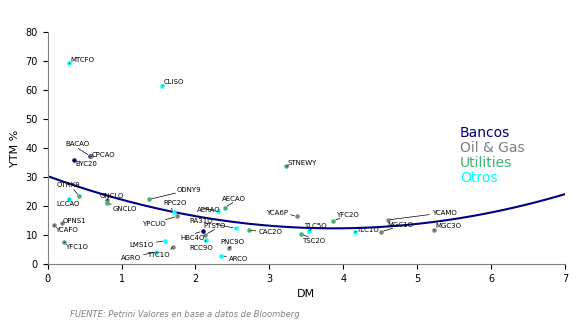

In [21]:
main_font = "Open Sans"
plot_color = "grey"

plot_color_corp = "navy"
plot_color_oil = "grey"
plot_color_util = "mediumseagreen"
plot_color_otros = "cyan"

font_dict1 = {'fontfamily':'Open Sans','color':'black','size':6}
font_dict2 = {'fontfamily':'Open Sans','color':'grey','size':6}
    
fuente = "FUENTE: Petrini Valores en base a datos de Bloomberg"    

from datetime import date
today = date.today()
t1 = today.strftime("%d/%m/%Y")

def plot_mtcars(adjust=True, *args, **kwargs):
    fig, ax = plt.subplots(figsize=(6, 3))
    fig.set_facecolor("white")
    plt.rcParams["figure.figsize"] = (10,7)    
    ax.plot(arbitrary_times_corp, poly_corp,c = plot_color_corp, zorder = 1)
    ax.scatter(dm_bancos, ytm_bancos, s = 5, c = plot_color_corp, zorder = 0) 
    ax.scatter(dm_oil, ytm_oil, s = 5, c = plot_color_oil, zorder = 0) 
    ax.scatter(dm_util, ytm_util, s = 5, c = plot_color_util, zorder = 0) 
    ax.scatter(dm_otros, ytm_otros, s = 5, c = plot_color_otros, zorder = 3)  
    texts = []
    for x, y, s in zip(df_corp['dm'], df_corp['ytm'], df_corp['cod_loc']):
        texts.append(plt.text(x, y, s, size=5))
    plt.xlabel('DM', fontsize=8)
    plt.ylabel('YTM %', fontsize=8)
    
    #fig.text(0.15,1,"BONOS CORPORATIVOS EN USD - LEY NUEVA YORK", fontsize=9, fontweight="bold", font = main_font)        
    #fig.text(0.15,0.95, t1 ,fontweight="regular", fontsize=6)
    fig.text(0.8,0.6,"Bancos", fontsize= 1, font = main_font, color = plot_color_corp)        
    fig.text(0.8,0.55,"Oil & Gas", fontsize= 1, font = main_font, color = plot_color_oil)
    fig.text(0.8,0.5,"Utilities", fontsize= 1, font = main_font, color = plot_color_util)        
    fig.text(0.8,0.45,"Otros", fontsize= 1, font = main_font, color = plot_color_otros)
    fig.text(0.15,0,fuente, fontdict = font_dict2, fontstyle = "italic")  

    ax.grid(False)

    ax.set_xlim(0,7)
    ax.set_ylim(0,80)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(plot_color)
    ax.spines['left'].set_color(plot_color)

    ax.tick_params(axis="x",color = "black", labelcolor = "black" ,labelsize = 7)
    ax.tick_params(axis="y",color = "black", labelcolor = "black" ,labelsize = 7)

    ax.set_position([0.1,0.1,0.5,0.5])

    plt.style.use('default')
    plt.rcParams['font.family'] = main_font
    if adjust:
        plt.title('%s iterations' % adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs), c = "white")
    else:
        plt.title('Original')

plot_mtcars()   

path_png = r'C:/Users/Bloomberg/Desktop/Gabriel/Corporativos_NY.png'
    
plt.tight_layout()
plt.savefig(path_png, dpi = 300)

# CURVA CER - Letras y Bonos

In [31]:
excel_pub = 'G:\Petrini Valores\8. Bloomberg\Informes\Renta Fija\Informe Publicos Pesos.xlsx'

df_pub = pd.read_excel(excel_pub,"pesosmm", engine = 'openpyxl') 


redondeo = df_pub.round(2)

columnas_nat = ['Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51']

df_pub.drop(columnas_nat, 1, inplace = True)

df_pub = df_pub.dropna(0, how='all')
df_pub = df_pub.dropna(1, how='all')

df_pub.columns = ['Especie','Código','Cupón','Precio AR$','TNA (%)','YTM (%)','DM','Volumen','VR', 'VT', 'Paridad', 'Fecha emisión', 'Maturity', 'Monto Emisión','ISIN']

df_pub["Volumen"] = df_pub["Volumen"].astype('int64')
df_pub['Monto Emisión'] = df_pub['Monto Emisión'].astype('int64')

df_pub["Volumen"] = df_pub.apply(lambda x: "{:,}".format(x["Volumen"]), axis=1)
df_pub['Monto Emisión'] = df_pub.apply(lambda x: "{:,}".format(x['Monto Emisión']), axis=1)

df_pub['Fecha emisión'] = df_pub['Fecha emisión'].dt.strftime('%d/%m/%Y')
df_pub['Maturity'] = df_pub['Maturity'].dt.strftime('%d/%m/%Y')

df_pub.loc[:,'Precio AR$'] *= 100
df_pub.loc[:,'TNA (%)'] *= 100
df_pub.loc[:,'YTM (%)'] *= 100
df_pub.loc[:,'VR'] *= 100
df_pub.loc[:,'VT'] *= 100

k = []
for i in df_pub['Cupón']:
    if i == 0: 
        k.append(str(i)+"%")
    else:
        k.append(i)


df_pub['Cupón'] = k


In [32]:
excel_pes = 'G:\Petrini Valores\8. Bloomberg\Informes\Renta Fija\Informe Publicos Pesos.xlsx'

df_pes = pd.read_excel(excel_pes,"pesosbonos", engine = 'openpyxl')

columnas_na = ['Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51']

df_pes.drop(columnas_na, 1, inplace = True)

df_pes = df_pes.dropna(0, how='all')
df_pes = df_pes.dropna(1, how='all')

df_pes.columns = ['Especie','Código','Cupón','Precio AR$','TNA (%)','YTM (%)','DM','Volumen','VR', 'VT', 'Paridad', 'Fecha emisión', 'Maturity', 'Monto Emisión','ISIN','Tipo']

df_pes["Volumen"] = df_pes["Volumen"].astype('int64')
df_pes['Monto Emisión'] = df_pes['Monto Emisión'].astype('int64')

df_pes["Volumen"] = df_pes.apply(lambda x: "{:,}".format(x["Volumen"]), axis=1)
df_pes['Monto Emisión'] = df_pes.apply(lambda x: "{:,}".format(x['Monto Emisión']), axis=1)

df_pes['Fecha emisión'] = df_pes['Fecha emisión'].dt.strftime('%d/%m/%Y')
df_pes['Maturity'] = df_pes['Maturity'].dt.strftime('%d/%m/%Y')

df_pes.loc[:,'Precio AR$'] *= 100
df_pes.loc[:,'TNA (%)'] *= 100
df_pes.loc[:,'YTM (%)'] *= 100
df_pes.loc[:,'VR'] *= 100
df_pes.loc[:,'VT'] *= 100

#df_pes['TNA (%)'] = df_pes['TNA (%)'][4:18].astype('str')
df_pes.loc[np.isnan(df_pes.iloc[:,4]),'TNA (%)'] = 0
df_pes['TNA (%)'] = df_pes['TNA (%)'].round(2)


In [38]:
df_pub

,Especie,Código,Cupón,Precio AR$,TNA (%),YTM (%),DM,Volumen,VR,VT,Paridad,Fecha emisión,Maturity,Monto Emisión,ISIN
0,Letras a descuento,S30A1,0%,96.199817,34.33,40.030876,0.115068,"1,152",100.0,100.000000,0.961998,29/01/2021,30/04/2021,"47,511,000,000",ARARGE520AB3
1,Letras a descuento,S30J1,0%,90.599248,36.77,41.885207,0.282192,"5,248",100.0,100.000000,0.905992,29/01/2021,30/06/2021,"52,377,000,000",ARARGE520AD9
2,Letras a descuento,SM311,0%,98.800107,36.94,44.365036,0.032877,"8,450",100.0,100.000000,0.988001,30/12/2020,31/03/2021,"97,785,000,000",ARARGE520AA5
3,Letras a descuento,S30L1,0%,87.699971,38.49,43.360690,0.364384,"1,070",100.0,100.000000,0.877000,26/02/2021,30/07/2021,"35,184,000,000",NaN
4,Letras Pases Pasivos,S31M1,"Pase + 3,2%",114.299830,3.33,48.544549,0.032877,"3,893",100.0,114.491357,0.998327,05/11/2020,31/03/2021,"46,757,000,000",ARARGE520A67
5,Letras Pases Pasivos,SA301,"Pase + 1,5%",105.099695,-0.33,42.529030,0.115068,"9,523",100.0,105.101370,0.999984,29/01/2021,30/04/2021,"62,953,000,000",ARARGE520AC1
6,Letras Pases Pasivos,S21Y1,"Pase + 3,5%",111.125071,3.20,46.812961,0.172603,0,100.0,111.835616,0.993647,01/12/2020,21/05/2021,"58,175,096,210",ARARGE520A83
7,Letras Pases Pasivos,SJ301,"Pase + 2,25%",105.101006,0.71,42.451623,0.282192,"2,551",100.0,105.202055,0.999039,29/01/2021,30/06/2021,"99,975,000,000",ARARGE520AE7
8,Letras Pases Pasivos,SL301,"Pase + 2,25%",102.136233,1.69,42.983823,0.364384,"1,010",100.0,102.229452,0.999088,26/02/2021,30/07/2021,"59,790,000,000",NaN
9,Letras ajustadas por CER,X21Y1,CER + 0%,115.399011,-4.74,-4.648268,0.172603,"8,085",100.0,114.454835,1.008249,30/11/2020,21/05/2021,"164,771,573,900",ARARGE520A75


In [41]:
lecer = df_pub.loc[df_pub['Especie'] == "Letras ajustadas por CER"]
dm_lecer = round(lecer['DM'],2)
ytm_lecer = round(lecer['YTM (%)'],2)

boncer = df_pes.loc[df_pes['Tipo'] == "CER"]
dm_boncer = round(boncer['DM'],2)
ytm_boncer = round(boncer['YTM (%)'],2)

In [46]:
#Curva Interpolada Ley Argentina

poly_degree = 2
curva_lecer = np.polyfit(dm_lecer, ytm_lecer, poly_degree)

start_lecer = 5
stop_lecer = 9
num_points= 10000
arbitrary_times_lecer = np.linspace(start_lecer, stop_lecer, num_points)

poly_lecer = np.polyval(curva_lecer, arbitrary_times_lecer)

#Curva Interpolada Ley Argentina

curva_boncer = np.polyfit(dm_boncer, ytm_boncer, poly_degree)

start_boncer = 5
stop_boncer = 8.5
num_points_boncer = 10000
arbitrary_times_boncer= np.linspace(start_boncer, stop_boncer, num_points_boncer)

poly_boncer = np.polyval(curva_boncer, arbitrary_times_boncer)

c:\users\bloomberg\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3427: RankWarning:

Polyfit may be poorly conditioned



KeyError: 'dm_lecer'

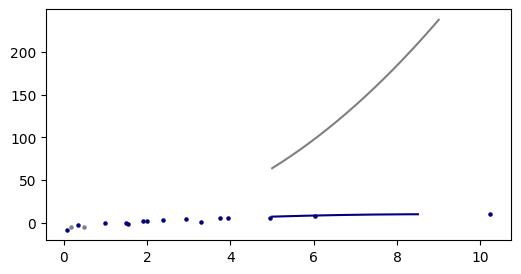

In [50]:
main_font = "Open Sans"
plot_color = "grey"

plot_color_boncer = "navy"
plot_color_lecer = "grey"
plot_color_eu = "mediumseagreen"

font_dict1 = {'fontfamily':'Open Sans','color':'black','size':6}
font_dict2 = {'fontfamily':'Open Sans','color':'grey','size':6}
    
fuente = "FUENTE: Petrini Valores en base a datos de Bloomberg"    

from datetime import date
today = date.today()
t1 = today.strftime("%d/%m/%Y")

def plot_mtcars(adjust=True, *args, **kwargs):
    fig, ax = plt.subplots(figsize=(6, 3))
    fig.set_facecolor("white")
    plt.rcParams["figure.figsize"] = (10,7)    
    ax.plot(arbitrary_times_lecer, poly_lecer,c = plot_color_lecer, zorder = 1)
    ax.scatter(dm_lecer, ytm_lecer, s = 5, c = plot_color_lecer, zorder = 0) 
    ax.plot(arbitrary_times_boncer, poly_boncer, c = plot_color_boncer, zorder = 2)
    ax.scatter(dm_boncer, ytm_boncer, s = 5, c = plot_color_boncer, zorder = 3)  
     
    texts = []
    for x, y, s in zip(df_lecer['dm_lecer'], df_lecer['ytm_lecer'], df_lecer['Código']):
        texts.append(plt.text(x, y, s, size=6))
    plt.xlabel('DM', fontsize=8)
    plt.ylabel('YTM %', fontsize=8)
    
    texto = []
    for x, y, s in zip(df_boncer['dm_boncer'], df_boncer['ytm_boncer'], df_boncer['Código']):
        texto.append(plt.text(x, y, s, size=6))
 
    
    #fig.text(0.15,1,"BONOS SOBERANOS EN USD", fontsize=9, fontweight="bold", font = main_font)        
    #fig.text(0.15,0.95, t1 ,fontweight="regular", fontsize=6)
    fig.text(0.8,0.4,"Boncer", fontsize= 1, font = main_font, color = plot_color_boncer)        
    fig.text(0.8,0.33,"Lecer", fontsize= 1, font = main_font, color = plot_color_lecer)
    fig.text(0.15,0,fuente, fontdict = font_dict2, fontstyle = "italic")  

    ax.grid(False)

    ax.set_xlim(4,10)
    ax.set_ylim(8,20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(plot_color)
    ax.spines['left'].set_color(plot_color)

    ax.tick_params(axis="x",color = "black", labelcolor = "black" ,labelsize = 7)
    ax.tick_params(axis="y",color = "black", labelcolor = "black" ,labelsize = 7)

    ax.set_position([0.1,0.1,0.5,0.5])

    plt.style.use('default')
    plt.rcParams['font.family'] = main_font
    if adjust:
        plt.title('%s iterations' % adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs), c = "white")
    else:
        plt.title('Original')

plot_mtcars()   

path_png = r'C:/Users/Bloomberg/Desktop/Gabriel/Curver_CER.png'
    
plt.tight_layout()
plt.savefig(path_png, dpi = 100)

# TASA FIJA - Botes y Ledes

# BADLAR - Provinciales

# BADLAR - Soberanos